<a href="https://colab.research.google.com/github/jlifferth/UQ-BIO-2022/blob/main/NumPy_uqBIO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro to Python: NumPy and Linear Algebra Review

----------
## Qbio Summer School 2022

--------------
```
Instructor: Will Raymond
Author: Will Raymond
Contact Info: wsraymon@rams.colostate.edu

```
<details>
  <summary>Copyright info</summary>

```
Copyright 2022 Brian Munsky

Redistribution and use in source and binary forms, with or without modification, are permitted provided that the following conditions are met:

1. Redistributions of source code must retain the above copyright notice, this list of conditions and the following disclaimer.

2. Redistributions in binary form must reproduce the above copyright notice, this list of conditions and the following disclaimer in the documentation and/or other materials provided with the distribution.

3. Neither the name of the copyright holder nor the names of its contributors may be used to endorse or promote products derived from this software without specific prior written permission.

THIS SOFTWARE IS PROVIDED BY THE COPYRIGHT HOLDERS AND CONTRIBUTORS "AS IS" AND ANY EXPRESS OR IMPLIED WARRANTIES, INCLUDING, BUT NOT LIMITED TO, THE IMPLIED WARRANTIES OF MERCHANTABILITY AND FITNESS FOR A PARTICULAR PURPOSE ARE DISCLAIMED. IN NO EVENT SHALL THE COPYRIGHT HOLDER OR CONTRIBUTORS BE LIABLE FOR ANY DIRECT, INDIRECT, INCIDENTAL, SPECIAL, EXEMPLARY, OR CONSEQUENTIAL DAMAGES (INCLUDING, BUT NOT LIMITED TO, PROCUREMENT OF SUBSTITUTE GOODS OR SERVICES; LOSS OF USE, DATA, OR PROFITS; OR BUSINESS INTERRUPTION) HOWEVER CAUSED AND ON ANY THEORY OF LIABILITY, WHETHER IN CONTRACT, STRICT LIABILITY, OR TORT (INCLUDING NEGLIGENCE OR OTHERWISE) ARISING IN ANY WAY OUT OF THE USE OF THIS SOFTWARE, EVEN IF ADVISED OF THE POSSIBILITY OF SUCH DAMAGE.
```
<details>

## NumPy

numpy and scipy are ubiquitous in the world of scientific computing in Python. NumPy, NumericPython, is a library that gives access to a lot of generalized array functions for linear algebra or manipulation that is not available with the list type in Python.

The core of numpy is the array so lets take a look at that first.

[Numpy Documentation](https://numpy.org/doc/stable/user/whatisnumpy.html)

## Array information methods

Numpy has some convenience methods to get information such as shape, dimensions, and information type.

In [9]:
import numpy as np

my_list = [0,1,2,3,4]
my_np_array = np.array(my_list)

print(my_np_array)
my_np_array.dtype

[0 1 2 3 4]


dtype('int64')

Numpy has some convenience methods to get information such as shape, dimensions, and information type.

Here's some common ones:

given ```arr = np.array([[0,1,2,3,4]])```

| Method    | Description  | Result
| ----------- | ----------- | ------------ | 
| arr.shape   |  returns a tuple of the size of each dimensions | ```(1,5) ```   |
| arr.ndim | number of dimensions |```2 ```   | 
| arr.dtype   |  the datatype of the info inside the array | ```dtype('int64') ```    
| arr.size | integer total entries of this array | ```5```  |  
| arr.nbytes | the number of bytes consumed by storing only the information inside the array | ``` 40 ```| 


In [7]:
arr = np.array([[0,1,2,3,4]])

dropdown = 'nbytes' #@param ["shape", "ndim", "dtype","size","nbytes"]

desc = {'shape': '',
               'ndim': 'dimensions',
               'dtype': '',
               'size': 'elements',
               'nbytes':'bytes'}

arr_methods = {'shape': arr.shape,
               'ndim':arr.ndim,
               'dtype':arr.dtype,
               'size':arr.size,
               'nbytes':arr.nbytes}


print('The %s of the array is %s %s' % (dropdown, str(arr_methods[dropdown]), desc[dropdown] ))


The nbytes of the array is 40 bytes


## Array allocation methods

| Method    | Description  | Examples  | Result
| ----------- | ----------- | ------------ | ------------ | 
| np.zeros([n1,n2...]) |  Returns an ndim array of zeros  | ```np.zeros([10,10,10]) ```   | a (10 x 10 x 10) 3d array of zeros
| np.ones([n1,n2...]) | Returns an ndim array of ones  |```np.ones([3,5]) ```   | a (3 x 5) 2d array of ones |
| np.array([n1,n2...]) | converts an iterable to an array | ``np.array([1,2,3])``  |  a 1d array of [1,2,3] |
| np.empty([n1,n2...]) | an empty ndim array | ``` np.empty([3,3]) ```| a (3 x 3) empty array - note values will be from whatever memory it allocated.

Specific cases for easily allocating ranges/identity matrix 

| Method    | Description  | Examples  
| ----------- | ----------- | ------------ | 
| np.linspace(start, stop, n_steps) | returns a linearly spaced array from start to stop with n_steps | ```np.linspace(0,10,11) ```  |  
| np.logspace(start, stop, n_steps) | returns a linearly spaced array from 10^start to 10^stop with n_step | ``` np.logspace(0,10,11)```| 
| np.eye(N)   | gives a 2d identify matrix of NxN|  ```np.eye(3) ```   | a (3 x 3) identity matrix (diagonals are 1)

In [10]:
print('np.zeros:')
print(np.zeros([3,3]))

print('')
print('np.ones:')
print(np.ones([3,3]))

print('')
list_of_lists = [ [y for y in range(0,3)] for x in range(0,3)]
print('np.array() of a list of lists')
print(np.array(list_of_lists ))

print('')
print('np.empty:')
print(np.empty([3,3]))
print('')
print('np.eye(3):')
print(np.eye(3))

np.zeros:
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]

np.ones:
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]

np.array() of a list of lists
[[0 1 2]
 [0 1 2]
 [0 1 2]]

np.empty:
[[0.e+000 5.e-324 1.e-323]
 [0.e+000 5.e-324 1.e-323]
 [0.e+000 5.e-324 1.e-323]]

np.eye(3):
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [11]:
start = 1
stop = 10
n_steps = 11
print(np.linspace(start, stop, n_steps))
print(np.logspace(np.log10(start), np.log10(stop), n_steps))

[ 1.   1.9  2.8  3.7  4.6  5.5  6.4  7.3  8.2  9.1 10. ]
[ 1.          1.25892541  1.58489319  1.99526231  2.51188643  3.16227766
  3.98107171  5.01187234  6.30957344  7.94328235 10.        ]


## Array manipulation methods

### Slicing/ Indexing rules

**array[ row, column, ...., n ]**

each dimension can be sliced or index just like its a python list:

for example lets consider this array 

```
arr = np.array([[1,2,3], \
                [4,5,6], \
                [7,8,9]])
```

| Example    | Description  | Result  
| ----------- | ----------- | ------------ | 
| arr[0] | row 0 | ``` [1,2,3] ```  |  
| arr[0,0]| element in row 0, column 0 | ``` [1]```| 
| arr[:,0]| column 0 | ``` [1,4,7]```| 
| arr[0:2,0:2]| top left block of size 2 x 2 | ``` array([[1,2],[4,5]])```| 
| arr[::-1]| reverses the rows | ```[[7,8,9],[4,5,6],[1,2,3]] ```| 
| arr[::-1, ::-1]| reverses the rows AND columns | ```[[9,8,7],[6,5,4],[3,2,1]] ```|


### Array logicals

numpy arrays will accept logical indexing or any indexing as long as the shape and maximum indices are correct.

| Example    | Description  | Result  
| ----------- | ----------- | ------------ | 
| arr[arr > 5 ]| returns all elements greater than 5| ```array([6, 7, 8, 9]) ```|  
| arr[1][arr[1] > 5 ]| returns all elements in row 1 greater than 5| ```array([6]) ```|  

## Other common manipulation methods:

| Method    | Description  | Examples  
| ----------- | ----------- | ------------ | 
| arr.reshape() | will resize an array, the new size must have the same amount of elements!| ```arr.resize(1,9)```  |  
| arr.T | transposes the array | ``` arr.T```| 
| np.expand_dims(array, axis) | adds an axis to a given array| ``` np.expand_dims(arr,axis=0)```| 
| arr.flatten()   | flattens an array to 1 dimension |  ```arr.flatten()```   | 
| np.diag(array,offset)   | gets the diagonal of an array based on offset from middle diag |  ```np.diag(arr,0)```   | 
| np.where(statement)   | returns indexes matching the statement |  ```np.where(arr < 5)```   | 
| np.at_least2d(arr)   | adds an axis to a 1d array if needed, leaves any ndim >= 2 alone|  ```np.atleast_2d(arr)```   | 
| np.tile(iterable, N) | repeat an iterable object N times along an axis | ``` np.tile(arr, N)```|
| np.hstack(iterable of iterables) |Horizontally stack the arrays provided in an iterable (list of arrays) | ```np.hstack([arr1,arr2])``` |
| np.vstack(iterable of iterables) | Vertically stack the arrays provided in an iterable (list of arrays) | ```np.vstack([arr1,arr2])```|
| ___.astype(dtype) | convert a given array to a particular data type | ```np.array([1.2,1.4,1.5]).astype(int)```|
| ___.tolist() | convert a given array to a python list or lists of lists| ```np.array([1.2,1.4,1.5]).tolist()```|



In [ ]:
arr = np.array([[1,2,3], \
                [4,5,6], \
                [7,8,9]])

print('')
print('Original:')
print(arr)

print('')
print('Reshaped:')
print(arr.reshape(1,9))

print('')
print('Flattened:')
print(arr.flatten())

print('')
print('Transpose:')
print(arr.T)

print('')
print('add an extra dimension to the front:')
print(np.expand_dims(arr, axis=0))

print('')
print('middle diagonal:')
print(np.diag(arr, 0))

print('')
print('indexes of array where the element is less than 5:')
print(np.where(arr < 5))


print('')
print('convert the array to the floating point datatype')
print(arr.astype(np.float64))


print('')
print('convert the array to a python list')
print(arr.tolist())



Original:
[[1 2 3]
 [4 5 6]
 [7 8 9]]

Reshaped:
[[1 2 3 4 5 6 7 8 9]]

Flattened:
[1 2 3 4 5 6 7 8 9]

Transpose:
[[1 4 7]
 [2 5 8]
 [3 6 9]]

add an extra dimension to the front:
[[[1 2 3]
  [4 5 6]
  [7 8 9]]]

middle diagonal:
[1 5 9]

indexes of array where the element is less than 5:
(array([0, 0, 0, 1]), array([0, 1, 2, 0]))

convert the array to the floating point datatype
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]

convert the array to a python list
[[1, 2, 3], [4, 5, 6], [7, 8, 9]]


## Linear algebra with Numpy

heres some examples of basic operations:

In [ ]:
A = np.array([[1, 2], [3, 4]]) #matrix 1
B = np.array([[5, 6], [7, 8]]) #matrix 2
n = 5

dropdown = 'scalar addition' #@param ["matrix multiplication", "matrix division","scalar multiplication", "matrix subtraction","matrix addition","scalar addition"]
examples = {'matrix multiplication': A*B,
            'matrix division': A/B,
            'scalar multiplication': n*A,
            'matrix subtraction': A - B,
            'matrix addition': A + B,
            'scalar addition': n + A,
            }
examples_str = {'matrix multiplication': 'A * B:',
            'matrix division': 'A / B:',
            'scalar multiplication': 'n*A',
            'matrix subtraction': 'A - B:',
            'matrix addition': 'A + B:',
            'scalar addition': 'n + A',
            }
print(examples_str[dropdown])
examples[dropdown]

n + A


array([[6, 7],
       [8, 9]])

Short list of linear algebra functionality in numpy

| Method    | Description  | 
| ----------- | ----------- |
| np.cross | cross product of vectors| 
| np.dot | dot product of arrays | 
| np.linalg.det | determinant of a matrix |
| np.linalg.inner | inner product | 
| np.linalg.outer | outer product| 
| np.matmul  | matrix product | 
| np.trace | trace of a matrix  | 
| np.linalg.norm | norm of a vector or matrix, takes arguments for nuclear/frobenius | 
| np.linalg.matrix_rank | rank of a matrix | 
| np.linalg.cond | condition of a matrix |
| np.linalg.inv  | matrix inverse (multiplicative) |  
| np.linalg.pinv  | matrix psuedo-inverse (Moore-Penrose) | 
| np.linalg.svd | Single Value Decomposition |
| np.linalg.null* | Null space |

For more specific commands check out the linalg module in numpy:
https://numpy.org/doc/stable/reference/routines.linalg.html

### Eigen vectors and values

| Method    | Description  | Examples  
| ----------- | ----------- | ------------ | 
| np.linalg.eig | returns the eigen vectors and values of a matrix| |  
| np.linalg.eigvals | returns the eigenvalues of a matrix | 



In [ ]:
random_matrix = np.random.randint(0,100,size=(5,5))
eigenvals, eigenvecs = np.linalg.eig(random_matrix)

print('Random matrix:')
print(random_matrix)
print('')
print('Eigen vectors:')
print(eigenvecs)
print('')
print('Eigen values:')
print(eigenvals)

Random matrix:
[[72 91 26 32 96]
 [25 11 24 97 96]
 [19 52 61 47 88]
 [44 35 98 86 69]
 [81 54 61 20 39]]

Eigen vectors:
[[ 0.48691204+0.j         -0.24630437-0.24764677j -0.24630437+0.24764677j
  -0.55954441+0.j          0.24149516+0.j        ]
 [ 0.40795394+0.j          0.7821585 +0.j          0.7821585 -0.j
   0.29765305+0.j         -0.49919155+0.j        ]
 [ 0.40613718+0.j          0.03163788-0.19932655j  0.03163788+0.19932655j
   0.20477556+0.j          0.15601191+0.j        ]
 [ 0.52338157+0.j          0.03237416+0.12365615j  0.03237416-0.12365615j
   0.62085368+0.j         -0.64003506+0.j        ]
 [ 0.39700702+0.j         -0.39647448+0.22797004j -0.39647448-0.22797004j
  -0.41342519+0.j          0.5084322 +0.j        ]]

Eigen values:
[282.60120012 +0.j         -40.54908787+29.28404406j
 -40.54908787-29.28404406j  49.50117411 +0.j
  17.9958015  +0.j        ]


## Random sampling with Numpy

Numpy provides a very nice random sampling library that is is widely used throughout scientific computing. 

```np.random.____```

| Method    | Description  | 
| ----------- | ----------- |
| rand | uniform random from 0 to 1| 
| randn | univariate normal from a mean of 0 and a variance of 1 | 
| randint| random integers from low to high|
| choice | pick a uniform random value from an array | 
| shuffle | shuffles an array along the first axis| 

Additionally np.random can sample from a list of statistical distributions, heres a short list: 

| Distribution    |
| ----------- | 
| [beta](https://en.wikipedia.org/wiki/Beta_distribution) | 
| [gamma](https://en.wikipedia.org/wiki/Gamma_distribution) | 
| [lognormal](https://en.wikipedia.org/wiki/Log-normal_distribution)| 
| [multivariate normal](https://en.wikipedia.org/wiki/Multivariate_normal_distribution) | 
| [poisson](https://en.wikipedia.org/wiki/Poisson_distribution) |
| [uniform](https://en.wikipedia.org/wiki/Continuous_uniform_distribution) |  
| [power](https://en.wikipedia.org/wiki/Power_law) |


We can additionally set the rng state with np.random.seed(integer) 

| Method    | Description  | 
| ----------- | ----------- |
| seed | set the seed of the RNG | 
| get_state | get the current state of the mersenne twister | 

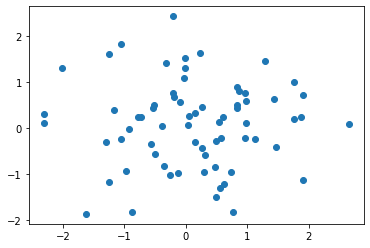

In [14]:
import matplotlib.pyplot as plt
import numpy.random as rng

n = 68 #@param {type:"slider", min:1, max:1000, step:1}
random_numbers = rng.rand(2,n)

dropdown = 'randn' #@param ["rand","randn","randint"]
examples_str = {'rand': rng.rand(2,n),
            'randn': rng.randn(2,n),
            'randint': rng.randint(0,1000,size = (2,n))}

random_numbers = examples_str[dropdown]
plt.plot(random_numbers[0],random_numbers[1],'o' )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: covariance is not positive-semidefinite.
  if __name__ == '__main__':


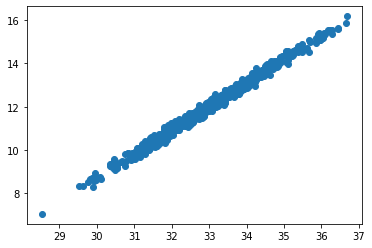

In [ ]:
import matplotlib.pyplot as plt
import numpy.random as rng

n = 674 #@param {type:"slider", min:1, max:1000, step:1}
mean1 = 33 #@param {type:"slider", min:1, max:100, step:1}
mean2 = 12 #@param {type:"slider", min:1, max:100, step:1}
cov = rng.randn(2,2)*3
cov[0,0] = 2; cov[1,1] = 2;
random_numbers = rng.multivariate_normal(np.array([mean1,mean2]), cov, size=n).T



plt.plot(random_numbers[0],random_numbers[1],'o' )

(array([0.05604478, 0.11586785, 0.10012494, 0.06926882, 0.04345044,
        0.02833725, 0.02581838, 0.01448348, 0.01259433, 0.00629717,
        0.00251887, 0.00503773, 0.0037783 , 0.        , 0.00125943,
        0.00251887, 0.00062972, 0.        , 0.00062972, 0.00125943,
        0.        , 0.00062972, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.00062972, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00062972]),
 array([ 1.0073232 ,  3.04063432,  5.07394544,  7.10725656,  9.14056768,
        11.1738788 , 13.20718992, 15.24050104, 17.27381216, 19.30712328,
        21.3404344 , 23.37374552, 25.40705664, 27.44036776, 29.47367888,
        31.50699   , 33.54030112, 35.57361224, 37.60692336, 39.64023448,
        41.6735456 , 43.70685672, 45.74016784, 47.77347896, 49.80679008,
        51.8401012 , 53.87341232, 55.90672344, 57.94003456, 59.97334568,
        62.00665

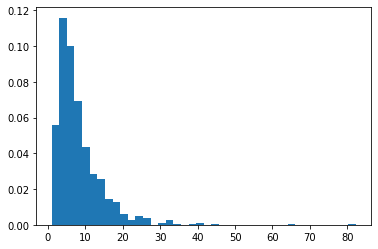

In [ ]:
import matplotlib.pyplot as plt
import numpy.random as rng

n = 781 #@param {type:"slider", min:1, max:1000, step:1}
mean = 1.9 #@param {type:"slider", min:0.1, max:5, step:0.1}
sigma = 0.7 #@param {type:"slider", min:0.1, max:5, step:0.1}

random_numbers = rng.lognormal(mean,sigma, size=(n))



plt.hist(random_numbers,density=True,bins=40 )

(array([0.5362356 , 0.43482714, 0.16901408, 0.03994878, 0.01536492,
        0.00460948]),
 array([0.        , 0.83333333, 1.66666667, 2.5       , 3.33333333,
        4.16666667, 5.        ]),
 <a list of 6 Patch objects>)

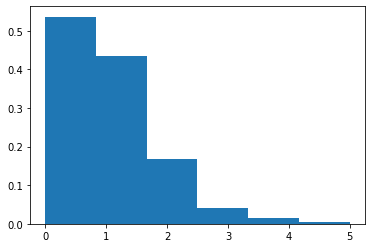

In [ ]:
import matplotlib.pyplot as plt
import numpy.random as rng

n = 781 #@param {type:"slider", min:1, max:1000, step:1}

lam = 0.8 #@param {type:"slider", min:0.1, max:5, step:0.1}

random_numbers = rng.poisson(lam, size=(n))



plt.hist(random_numbers,density=True,bins=max(random_numbers+1), align='mid' )

## Questions

In [18]:
from numpy.ma.core import diag
# Get the diagonal of the following matrix

matrix = np.array([[1,2,3,],
                   [3,4,5,],
                   [6,7,8,]])

diagonal = []
for i in range(0, matrix.shape[0]):
  for j in range(0, matrix.shape[1]):
    if i == j:
      diagonal = diagonal + [matrix[i, j]]

print(diagonal)


print(np.diag(matrix, k=-1))
np.diag?

[1, 4, 8]
[3 7]


In [19]:
# make a 4x4 Identity matrix 

identity_mat = 1

np.eye(4)

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [26]:
# take the upper left 3x3 of the following matrix:

random_mat = np.random.randint(0,10, size=[10,10])

print(random_mat)

upper_3by3 = random_mat[:3,:3]
print(upper_3by3)

[[7 2 1 6 4 4 8 8 2 5]
 [2 6 9 5 0 5 8 5 4 5]
 [8 5 8 3 7 8 7 6 6 7]
 [1 3 1 4 4 6 9 1 9 9]
 [0 2 6 0 7 7 8 8 1 5]
 [4 8 1 0 7 8 6 9 0 6]
 [3 4 5 5 4 9 3 2 1 3]
 [5 0 6 1 6 9 3 6 5 9]
 [2 8 8 0 5 6 0 6 3 8]
 [2 4 6 2 4 4 6 4 6 2]]
[[7 2 1]
 [2 6 9]
 [8 5 8]]


In [31]:
# Flip this array vertically

random_mat = np.random.randint(0,10, size=[10,10])
print(random_mat)

random_mat_flipped_ud = random_mat[::-1,]
print(random_mat_flipped_ud)

print(np.flipud(random_mat))
print(np.fliplr(random_mat))


[[2 2 2 3 0 8 9 1 8 0]
 [7 8 1 3 5 7 8 2 2 6]
 [5 9 7 0 3 7 1 8 8 9]
 [4 0 8 8 8 8 7 4 1 5]
 [4 7 8 1 3 5 3 7 9 3]
 [5 0 0 2 2 9 6 0 0 5]
 [1 4 8 6 2 6 1 7 8 1]
 [7 4 3 2 5 2 4 6 2 2]
 [8 8 8 0 7 0 4 2 3 3]
 [1 2 1 5 3 3 3 2 0 1]]
[[1 2 1 5 3 3 3 2 0 1]
 [8 8 8 0 7 0 4 2 3 3]
 [7 4 3 2 5 2 4 6 2 2]
 [1 4 8 6 2 6 1 7 8 1]
 [5 0 0 2 2 9 6 0 0 5]
 [4 7 8 1 3 5 3 7 9 3]
 [4 0 8 8 8 8 7 4 1 5]
 [5 9 7 0 3 7 1 8 8 9]
 [7 8 1 3 5 7 8 2 2 6]
 [2 2 2 3 0 8 9 1 8 0]]
[[1 2 1 5 3 3 3 2 0 1]
 [8 8 8 0 7 0 4 2 3 3]
 [7 4 3 2 5 2 4 6 2 2]
 [1 4 8 6 2 6 1 7 8 1]
 [5 0 0 2 2 9 6 0 0 5]
 [4 7 8 1 3 5 3 7 9 3]
 [4 0 8 8 8 8 7 4 1 5]
 [5 9 7 0 3 7 1 8 8 9]
 [7 8 1 3 5 7 8 2 2 6]
 [2 2 2 3 0 8 9 1 8 0]]
[[0 8 1 9 8 0 3 2 2 2]
 [6 2 2 8 7 5 3 1 8 7]
 [9 8 8 1 7 3 0 7 9 5]
 [5 1 4 7 8 8 8 8 0 4]
 [3 9 7 3 5 3 1 8 7 4]
 [5 0 0 6 9 2 2 0 0 5]
 [1 8 7 1 6 2 6 8 4 1]
 [2 2 6 4 2 5 2 3 4 7]
 [3 3 2 4 0 7 0 8 8 8]
 [1 0 2 3 3 3 5 1 2 1]]


In [32]:
# Transpose this array

random_mat = np.random.randint(0,10, size=[10,10])

random_mat_transpose = random_mat.T
print(random_mat_transpose)

[[7 2 2 5 3 7 8 1 2 3]
 [3 1 8 5 8 2 5 6 7 3]
 [4 3 2 8 7 5 4 5 7 4]
 [6 5 9 2 5 8 6 6 3 9]
 [1 2 1 9 3 5 4 3 5 2]
 [6 4 2 2 6 8 6 3 4 4]
 [1 9 5 6 0 0 2 9 7 5]
 [8 2 5 4 2 9 9 5 1 8]
 [3 5 2 0 6 4 7 2 3 2]
 [5 7 4 6 9 3 3 0 3 5]]


In [38]:
# Repeat the following 1x3 array 3 times to make a 3x3 matrix

row = np.array([1,2,3])

matrix = np.array([1,2,3]*3).reshape(3,3)
print(matrix)
matrix = np.array([1,2,3,4]*3).reshape(3,4)
print(matrix)

matrix = np.tile(row, 3).reshape(3,3)
matrix

[[1 2 3]
 [1 2 3]
 [1 2 3]]
[[1 2 3 4]
 [1 2 3 4]
 [1 2 3 4]]


array([[1, 2, 3],
       [1, 2, 3],
       [1, 2, 3]])

In [39]:
matrix = np.vstack((row, row, row))
matrix

array([[1, 2, 3],
       [1, 2, 3],
       [1, 2, 3]])

In [40]:
# Get the deteriminant of the following matrix:

matrix = np.array([[1,2,3],
                   [3,4,5],
                   [6,7,8]])

determinant = np.linalg.det(matrix)
print(determinant)

0.0


(array([23., 50., 27.]),
 array([-0.1453463 ,  2.99070168,  6.12674966,  9.26279764]),
 <a list of 3 Patch objects>)

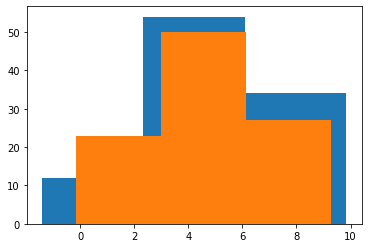

In [58]:
# Generate a randomly distributed array with one global mean and one global variance


mu = 5
var = 5

randn_mat = np.random.multivariate_normal(np.array([mu,]), 
                                          np.array([[var,]]),size=(1,100))

# print(randn_mat)

randn_mat2 = np.sqrt(var)*np.random.randn(100) + mu
# print(randn_mat2)

plt.hist(randn_mat[0], bins=3)
plt.hist(randn_mat2, bins=3)

## Extra Questions

* Which numpy function(s) concatenate multiple arrays together? 
* Which functions add an extra dimension to a numpy array along any axis?
* How would you convert a matrix to a different datatype?
* How can you calculate the memory constraints of a matrix given its datatype and shape before you allocate it?
* How can we view the flags of a Numpy array?
* What's the difference between an array of zeros and an empty array?

In [60]:
np.array([np.array([1,2,3])]).shape


np.array([1,2,3])[np.newaxis,:]


array([[1, 2, 3]])

## Additional Reading

Sparse matrices in Python (through SciPy)
https://docs.scipy.org/doc/scipy/reference/sparse.html